# Anti Join

### pandas.merge - arguments
- left
- right
- how : Default inner - left, right, inner, outer, cross
- on : Common key
- left_on :  Key from left dataframe
- right_on : Key from right dataframe
- left_index : Dafault False - uses index from the left dataframe to join
- right_index : Default False
- sort : Default False, sorts on the key
- suffixes : Default ("_x", "_y")
- copy : default True
- indicator : default False : adds a column "_merge" to the dataframe with merge information
- validate : optional - checks if merge is 1:m, m:1, 1:1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install matplotlib_venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


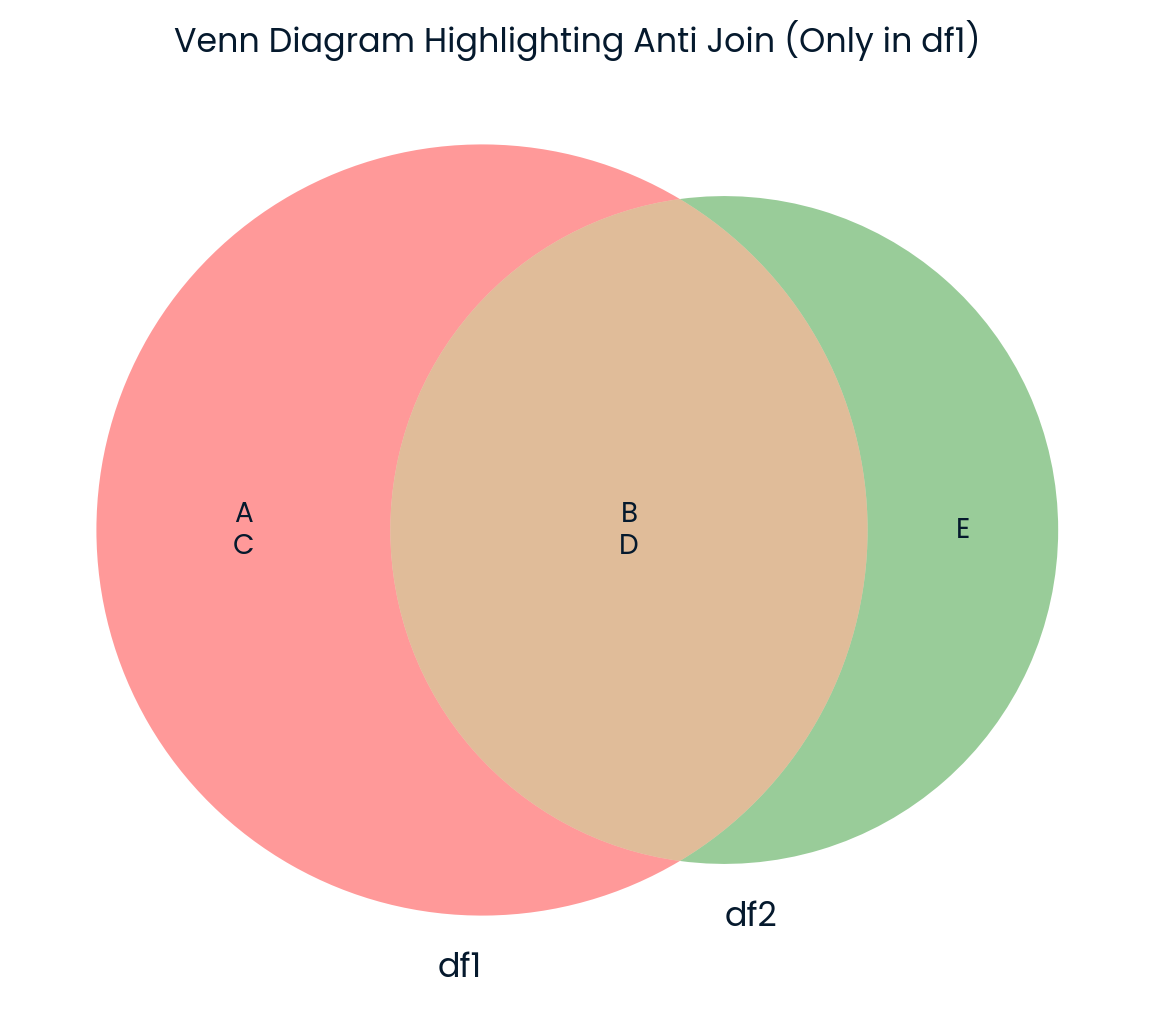

In [17]:
# Example of Anti Join using pandas and Venn Diagram

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create sample dataframes
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value_df1': [1, 2, 3, 4]
})

df2 = pd.DataFrame({
    'key': ['B', 'D', 'E'],
    'value_df2': [5, 6, 7]
})

# Perform a left merge to find rows in df1 that do not have a match in df2
merged_df = pd.merge(df1, df2, on='key', how='left', indicator=True)

# Filter the merged dataframe to get only the rows that are present in df1 but not in df2
anti_join_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['value_df2', '_merge'])

# Display the result
anti_join_df

# Venn Diagram to highlight Anti Join

# Create sets for the Venn diagram
set_df1 = set(df1['key'])
set_df2 = set(df2['key'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set_df1, set_df2], ('df1', 'df2'))

# Highlight the anti join part (only in df1)
venn.get_label_by_id('10').set_text('\n'.join(set_df1 - set_df2))
venn.get_label_by_id('01').set_text('\n'.join(set_df2 - set_df1))
venn.get_label_by_id('11').set_text('\n'.join(set_df1 & set_df2))

plt.title("Venn Diagram Highlighting Anti Join (Only in df1)")
plt.show()

## Reading the files

In [18]:
transaction = pd.read_excel("Merge_AntiJoin.xlsx", sheet_name= 0)

transaction.head()

,CustomerID,Product,Date,Year_Month,Value
0,3047,D,2013-09-10,2013_09,4244
1,4782,C,2015-11-19,2015_11,1066
2,6896,E,2019-08-09,2019_08,4119
3,3014,E,2014-11-28,2014_11,4501
4,1409,A,2015-07-02,2015_07,3519


In [19]:
transaction['Date'] = transaction.Date.astype(str).apply(lambda x: x[:10])

In [20]:
transaction.head()

,CustomerID,Product,Date,Year_Month,Value
0,3047,D,2013-09-10,2013_09,4244
1,4782,C,2015-11-19,2015_11,1066
2,6896,E,2019-08-09,2019_08,4119
3,3014,E,2014-11-28,2014_11,4501
4,1409,A,2015-07-02,2015_07,3519


In [21]:
customer = pd.read_excel("Merge_AntiJoin.xlsx", sheet_name= 1)

customer.head()

,CustomerID,DOB
0,3047,1974-04-13
1,4782,1982-01-29
2,6896,1982-01-12
3,3014,1984-09-27
4,1409,1995-05-26


In [22]:
customer['DOB'] = customer['DOB'].astype(str).apply(lambda x: x[:10])

In [23]:
customer.head()

,CustomerID,DOB
0,3047,1974-04-13
1,4782,1982-01-29
2,6896,1982-01-12
3,3014,1984-09-27
4,1409,1995-05-26


## Question :  The customer sheet contains list of internal test customers. Remove them from the transaction data and get the revenue by Year_Month

In [24]:
transaction_age = pd.merge(transaction, customer, on = 'CustomerID', how = 'left', indicator = True)

transaction_age.head()

,CustomerID,Product,Date,Year_Month,Value,DOB,_merge
0,3047,D,2013-09-10,2013_09,4244,1974-04-13,both
1,4782,C,2015-11-19,2015_11,1066,1982-01-29,both
2,6896,E,2019-08-09,2019_08,4119,1982-01-12,both
3,3014,E,2014-11-28,2014_11,4501,1984-09-27,both
4,1409,A,2015-07-02,2015_07,3519,1995-05-26,both


In [25]:
# Age at the time of purchase
transaction_age['Age'] = round((pd.to_datetime(transaction_age['Date']) - pd.to_datetime(transaction_age['DOB'])).dt.days/365,1)

In [12]:
transaction_age['_merge'].value_counts()

_merge
both          128
left_only      53
right_only      0
Name: count, dtype: int64

In [26]:
transaction_age.head()

,CustomerID,Product,Date,Year_Month,Value,DOB,_merge,Age
0,3047,D,2013-09-10,2013_09,4244,1974-04-13,both,39.4
1,4782,C,2015-11-19,2015_11,1066,1982-01-29,both,33.8
2,6896,E,2019-08-09,2019_08,4119,1982-01-12,both,37.6
3,3014,E,2014-11-28,2014_11,4501,1984-09-27,both,30.2
4,1409,A,2015-07-02,2015_07,3519,1995-05-26,both,20.1


In [27]:
transaction_antijoin = transaction_age[transaction_age['_merge'] == 'left_only']

transaction_antijoin

,CustomerID,Product,Date,Year_Month,Value,DOB,_merge,Age
49,4404,B,2016-04-14,2016_04,2966,NaN,left_only,NaN
50,5405,E,2023-01-23,2023_01,4156,NaN,left_only,NaN
51,565,A,2019-08-31,2019_08,2540,NaN,left_only,NaN
52,1779,D,2012-07-06,2012_07,4190,NaN,left_only,NaN
53,1927,B,2014-11-19,2014_11,2014,NaN,left_only,NaN
54,9591,A,2022-07-06,2022_07,1821,NaN,left_only,NaN
55,8330,C,2019-02-21,2019_02,3250,NaN,left_only,NaN
56,3549,B,2018-04-16,2018_04,4791,NaN,left_only,NaN
57,9994,B,2014-11-06,2014_11,3912,NaN,left_only,NaN
58,4579,C,2017-10-13,2017_10,1313,NaN,left_only,NaN


In [28]:
transaction_antijoin.groupby(['Year_Month']).agg(Revenue = ('Value', 'sum'))

,Revenue
Year_Month,
2012_07,4190
2012_10,2703
2013_02,1228
2013_03,2819
2013_04,2934
2014_03,6770
2014_06,5271
2014_11,5926
2015_01,7520


<Axes: xlabel='Year_Month'>

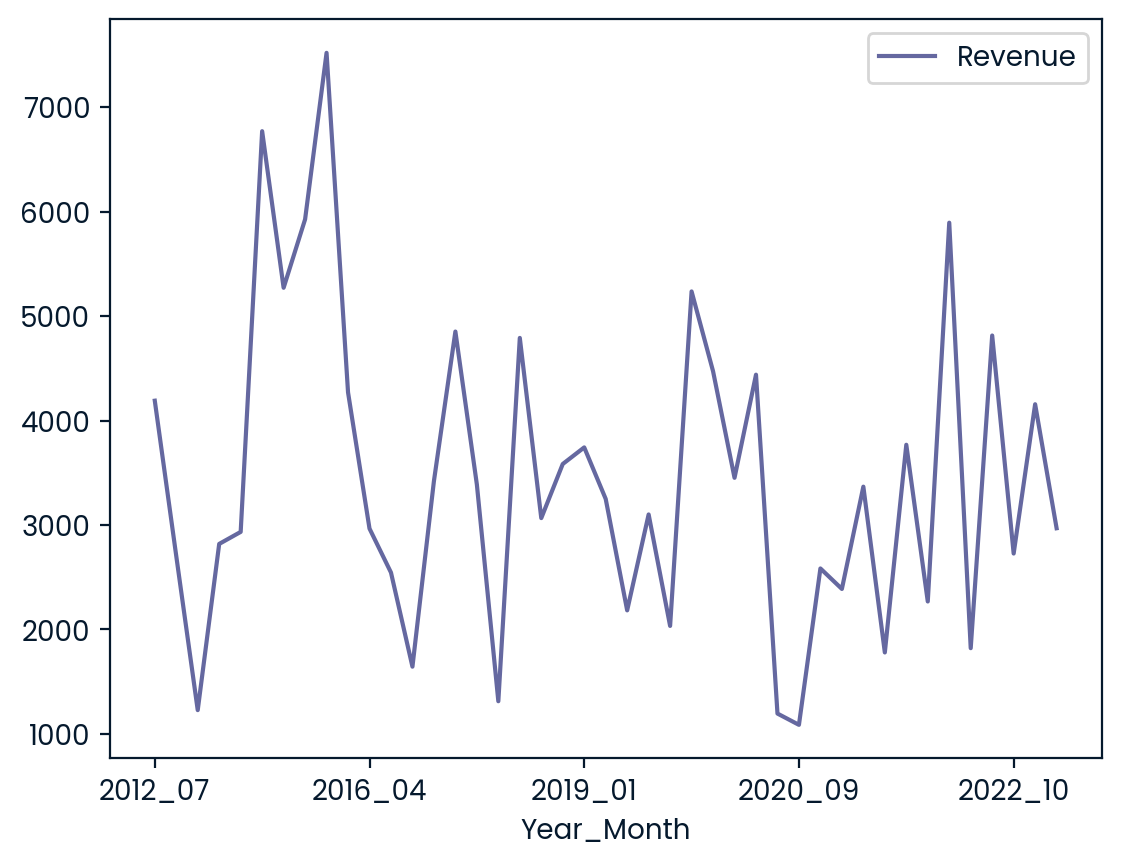

In [29]:
transaction_antijoin.groupby(['Year_Month']).agg(Revenue = ('Value', 'sum')).plot()